# Introduction
Greetings! I'm Gurpreet Singh, an AI engineer passionate about leveraging cutting-edge technologies to solve complex problems. With a strong background in artificial intelligence, machine learning, and data science, I thrive on exploring innovative solutions that push the boundaries of what's possible.

* Developing predictive models for financial forecasting.
* Implementing computer vision solutions for object detection and classification.
* Building conversational AI systems for customer support and virtual assistants.
* Contributing to research and development initiatives aimed at advancing the field of artificial intelligence.
# **LinkedIn:** https://www.linkedin.com/in/gurpereet-singh-9836781a5
# **Github:**https://github.com/gurpreetsingh1111/Movie-Rating-Prediction

# Loading a DataSets

In [1]:
import pandas as pd

def collect_movie_data(file_path, encodings=['utf-8', 'latin1', 'ISO-8859-1']):
    """
    Collect movie data from a CSV file or other sources.

    Parameters:
    - file_path: str, path to the CSV file containing movie data.
    - encodings: list of str, encodings to try (default is ['utf-8', 'latin1', 'ISO-8859-1']).

    Returns:
    - DataFrame containing movie data.
    """

    for encoding in encodings:
        try:
            # Load the dataset into a DataFrame
            movie_data = pd.read_csv(file_path, encoding=encoding)

            # Ensure the dataset includes the target variable, which is the movie rating
            if 'Rating' not in movie_data.columns:
                raise ValueError("Target variable 'Rating' is missing from the dataset.")

            return movie_data

        except FileNotFoundError:
            print(f"Error: File {file_path} not found.")
            return None
        except Exception as e:
            print(f"An error occurred with encoding {encoding}: {str(e)}")
            continue

    print("Unable to load the dataset. Please check the file path and encoding.")
    return None

# Example usage:
file_path = "/kaggle/input/imdb-india-movies/IMDb Movies India.csv"  # Update this with the path to your dataset
movie_dataset = collect_movie_data(file_path)

# Check if the dataset was loaded successfully
if movie_dataset is not None:
    print("Dataset loaded successfully!")
    print(movie_dataset.head())  # Display the first few rows of the dataset


An error occurred with encoding utf-8: 'utf-8' codec can't decode byte 0xe9 in position 3: invalid continuation byte
Dataset loaded successfully!
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  R

In [2]:
movie_dataset.head(10)

Name    Year Duration  \
0                                         NaN      NaN   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
2                         #Homecoming  (2021)   90 min   
3                             #Yaaram  (2019)  110 min   
4                   ...And Once Again  (2010)  105 min   
5                ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                           ...Yahaan  (2005)  142 min   
7                      .in for Motion  (2008)   59 min   
8                  ?: A Question Mark  (2012)   82 min   
9                            @Andheri  (2014)  116 min   

                       Genre  Rating  Votes            Director  \
0                      Drama     NaN    NaN       J.S. Randhawa   
1                      Drama     7.0      8       Gaurav Bakshi   
2             Drama, Musical     NaN    NaN  Soumyajit Majumdar   
3            Comedy, Romance     4.4     35          Ovais Khan   
4                      Drama     NaN    NaN        Amol Palekar   
5     Comedy, Drama, Musical     4.7    827        Rahul Rawail   
6        Drama, Romance, War     7.4  1,086      Shoojit Sircar   
7                Documentary     NaN    NaN       Anirban Datta   
8  Horror, Mystery, Thriller     5.6    326       Allyson Patel   
9    Action, Crime, Thriller     4.0     11   Biju Bhaskar Nair   

           Actor 1                 Actor 2          Actor 3  
0         Manmauji                  Birbal  Rajendra Bhatia  
1     Rasika Dugal          Vivek Ghamande    Arvind Jangid  
2     Sayani Gupta       Plabita Borthakur       Roy Angana  
3          Prateik              Ishita Raj  Siddhant Kapoor  
4     Rajat Kapoor      Rituparna Sengupta      Antara Mali  
5       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
6  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma  
7              NaN                     NaN              NaN  
8        Yash Dave          Muntazir Ahmad     Kiran Bhatia  
9        Augustine            Fathima Babu             Byon

# Data Processing 

* Load the dataset into your Python environment using pandas or any other suitable library.
* Explore the dataset to understand its structure, features, and any missing values.
* Handle missing values appropriately, either by imputing them or removing rows/columns with missing data.
* Convert categorical variables like genre, director, and actors into numerical representations using techniques like one-hot encoding or label encoding.

In [3]:
# Explore the dataset to understand its structure, features, and any missing values
print("Dataset Info:")
print(movie_dataset.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [4]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(movie_dataset.head())


First few rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Ang

In [5]:
# Check for missing values
print("\nMissing values:")
print(movie_dataset.isnull().sum())


Missing values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [6]:
# Handle missing values appropriately, either by imputing them or removing rows/columns with missing data
# For example, you can drop rows with missing values
movie_dataset.dropna(inplace=True)

In [7]:
null_rows = movie_dataset[movie_dataset.iloc[: , 1:9].isna().apply(lambda x: all(x), axis=1)]
print("Below are the Missing values for each column from 1 to 9:")
null_rows.head()

Below are the Missing values for each column from 1 to 9:


Empty DataFrame
Columns: [Name, Year, Duration, Genre, Rating, Votes, Director, Actor 1, Actor 2, Actor 3]
Index: []

In [8]:
movie_dataset = movie_dataset[~movie_dataset.iloc[: , 1:9].isna().apply(lambda x: all(x), axis=1)]
movie_dataset.shape

(5659, 10)

In [9]:
duplicate = movie_dataset[movie_dataset.duplicated(subset = ['Name', 'Year'], keep = False)]
print("Below are the duplicate rows according to Name and Year:")
duplicate.head()

Below are the duplicate rows according to Name and Year:


Name    Year Duration                          Genre  \
6062   India's Daughter  (2015)   63 min  Documentary, Biography, Crime   
6063   India's Daughter  (2015)  120 min           Action, Crime, Drama   
12420  Sant Dnyaneshwar  (1940)  139 min                        Fantasy   
12421  Sant Dnyaneshwar  (1940)  137 min                      Biography   

       Rating  Votes                 Director              Actor 1  \
6062      8.2  1,998             Leslee Udwin            Asha Devi   
6063      6.9     21              Rupesh Paul  Omkar Das Manikpuri   
12420     7.9     45  Vishnupant Govind Damle      Sheikh Fattelal   
12421     8.1      9  Vishnupant Govind Damle      Sheikh Fattelal   

            Actor 2              Actor 3  
6062    Badri Singh             Satendra  
6063   Amann Grewal    Vishal Om Prakash  
12420   Shahu Modak  Datta Dharmadhikari  
12421   Shahu Modak  Datta Dharmadhikari

In [10]:
movie_dataset.drop_duplicates(subset=['Name', 'Year'], inplace=True)
movie_dataset.shape

(5657, 10)

In [11]:
null_rows = movie_dataset[movie_dataset.iloc[: , [1,2,4,5]].isna().apply(lambda x: all(x), axis=1)]
print("Below are the Missing values for each column from 1 to 5 excluding Genre:")
null_rows.head()

Below are the Missing values for each column from 1 to 5 excluding Genre:


Empty DataFrame
Columns: [Name, Year, Duration, Genre, Rating, Votes, Director, Actor 1, Actor 2, Actor 3]
Index: []

In [12]:
movie_dataset = movie_dataset[~movie_dataset.iloc[: , [1,2,4,5]].isna().apply(lambda x: all(x), axis=1)]
movie_dataset.shape

(5657, 10)

In [13]:
movie_dataset['Year'] = movie_dataset['Year'].str.replace(r'(', '').str.replace(r')', '')
movie_dataset.head()

Name  Year Duration  \
1  #Gadhvi (He thought he was Gandhi)  2019  109 min   
3                             #Yaaram  2019  110 min   
5                ...Aur Pyaar Ho Gaya  1997  147 min   
6                           ...Yahaan  2005  142 min   
8                  ?: A Question Mark  2012   82 min   

                       Genre  Rating  Votes        Director          Actor 1  \
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War     7.4  1,086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai Bachchan    Shammi Kapoor  
6          Minissha Lamba   Yashpal Sharma  
8          Muntazir Ahmad     Kiran Bhatia

In [14]:
movie_dataset['Duration'] = movie_dataset['Duration'].str.replace(r' min', '')
movie_dataset.head()

Name  Year Duration  \
1  #Gadhvi (He thought he was Gandhi)  2019      109   
3                             #Yaaram  2019      110   
5                ...Aur Pyaar Ho Gaya  1997      147   
6                           ...Yahaan  2005      142   
8                  ?: A Question Mark  2012       82   

                       Genre  Rating  Votes        Director          Actor 1  \
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War     7.4  1,086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai Bachchan    Shammi Kapoor  
6          Minissha Lamba   Yashpal Sharma  
8          Muntazir Ahmad     Kiran Bhatia

In [15]:
movie_dataset.drop(movie_dataset.loc[movie_dataset['Year']=='2022'].index, inplace = True)
movie_dataset.shape

(5657, 10)

In [16]:
movie_dataset.head(10)

Name  Year Duration  \
1   #Gadhvi (He thought he was Gandhi)  2019      109   
3                              #Yaaram  2019      110   
5                 ...Aur Pyaar Ho Gaya  1997      147   
6                            ...Yahaan  2005      142   
8                   ?: A Question Mark  2012       82   
9                             @Andheri  2014      116   
10           1:1.6 An Ode to Lost Love  2004       96   
11                1:13:7 Ek Tera Saath  2016      120   
12                            100 Days  1991      161   
13                           100% Love  2012      166   

                        Genre  Rating  Votes           Director  \
1                       Drama     7.0      8      Gaurav Bakshi   
3             Comedy, Romance     4.4     35         Ovais Khan   
5      Comedy, Drama, Musical     4.7    827       Rahul Rawail   
6         Drama, Romance, War     7.4  1,086     Shoojit Sircar   
8   Horror, Mystery, Thriller     5.6    326      Allyson Patel   
9     Action, Crime, Thriller     4.0     11  Biju Bhaskar Nair   
10                      Drama     6.2     17        Madhu Ambat   
11                     Horror     5.9     59    Arshad Siddiqui   
12  Horror, Romance, Thriller     6.5    983       Partho Ghosh   
13     Comedy, Drama, Romance     5.7    512        Rabi Kinagi   

            Actor 1                 Actor 2          Actor 3  
1      Rasika Dugal          Vivek Ghamande    Arvind Jangid  
3           Prateik              Ishita Raj  Siddhant Kapoor  
5        Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
6   Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma  
8         Yash Dave          Muntazir Ahmad     Kiran Bhatia  
9         Augustine            Fathima Babu             Byon  
10   Rati Agnihotri          Gulshan Grover    Atul Kulkarni  
11     Pankaj Berry            Anubhav Dhir     Hritu Dudani  
12    Jackie Shroff           Madhuri Dixit    Javed Jaffrey  
13             Jeet           Koyel Mallick      Sujoy Ghosh

# EDA (Exploratory Data Analysis)

* Conduct exploratory data analysis (EDA) to gain insights into the relationships between different features and the target variable (Rating).
* Explore summary statistics, distributions, and correlations between numerical features.
* Visualize relationships and distributions using plots such as histograms, scatter plots, and box plots.

Summary statistics:
            Rating
count  5657.000000
mean      5.897967
std       1.381035
min       1.100000
25%       5.000000
50%       6.100000
75%       6.900000
max      10.000000


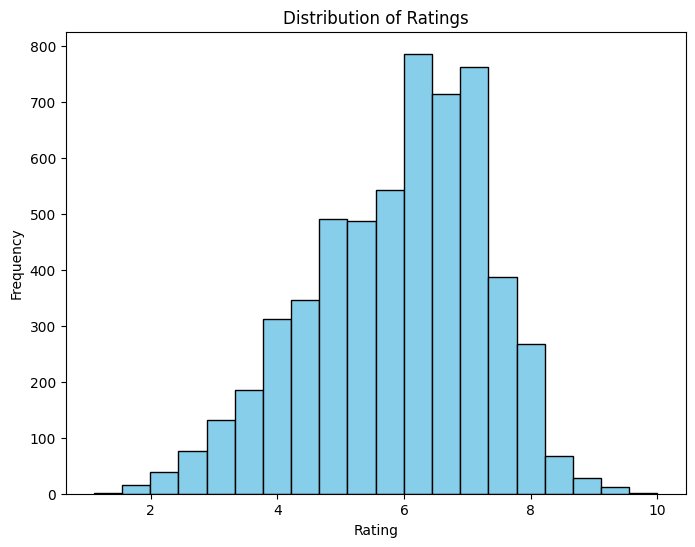

In [17]:
import matplotlib.pyplot as plt

# Summary statistics
print("Summary statistics:")
print(movie_dataset.describe())

# Histogram of ratings
plt.figure(figsize=(8, 6))
plt.hist(movie_dataset['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


<Figure size 1200x600 with 0 Axes>

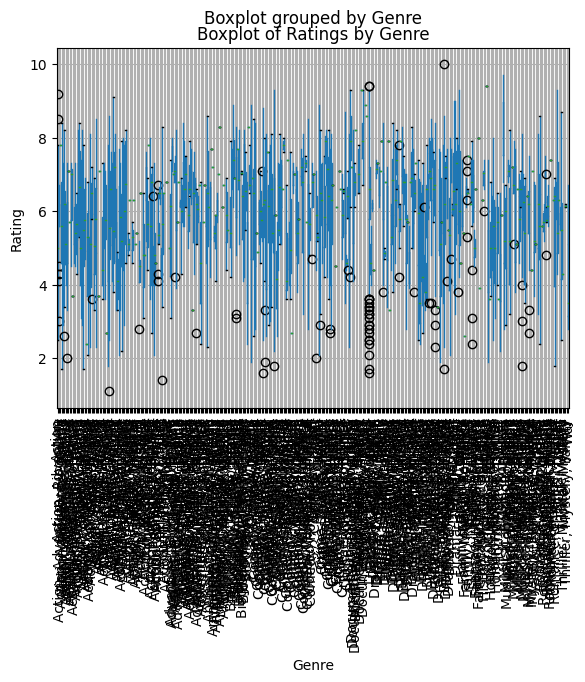

In [18]:
# Box plot of ratings vs. genre
plt.figure(figsize=(12, 6))
movie_dataset.boxplot(column='Rating', by='Genre', rot=90)
plt.title('Boxplot of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

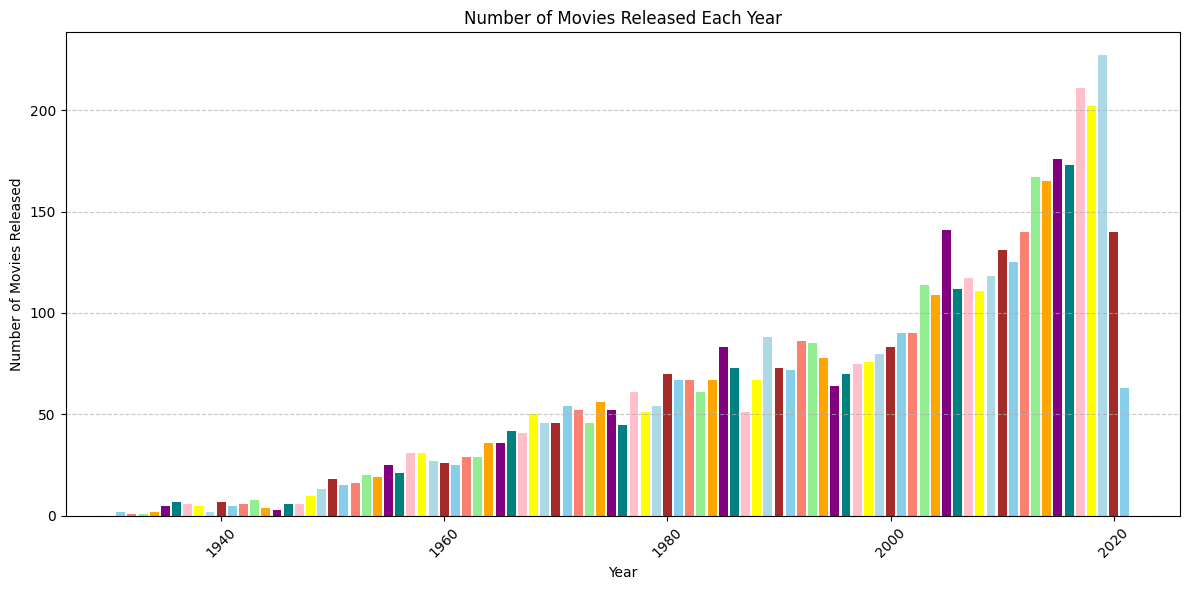

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

movie_dataset['Year'] = movie_dataset['Year'].astype(float)

# Count the number of movies released each year
movies_per_year = movie_dataset['Year'].value_counts().sort_index()

# Define colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'teal', 'pink', 'yellow', 'lightblue', 'brown']

# Plot the number of movies released each year
plt.figure(figsize=(12, 6))
plt.bar(movies_per_year.index, movies_per_year.values, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


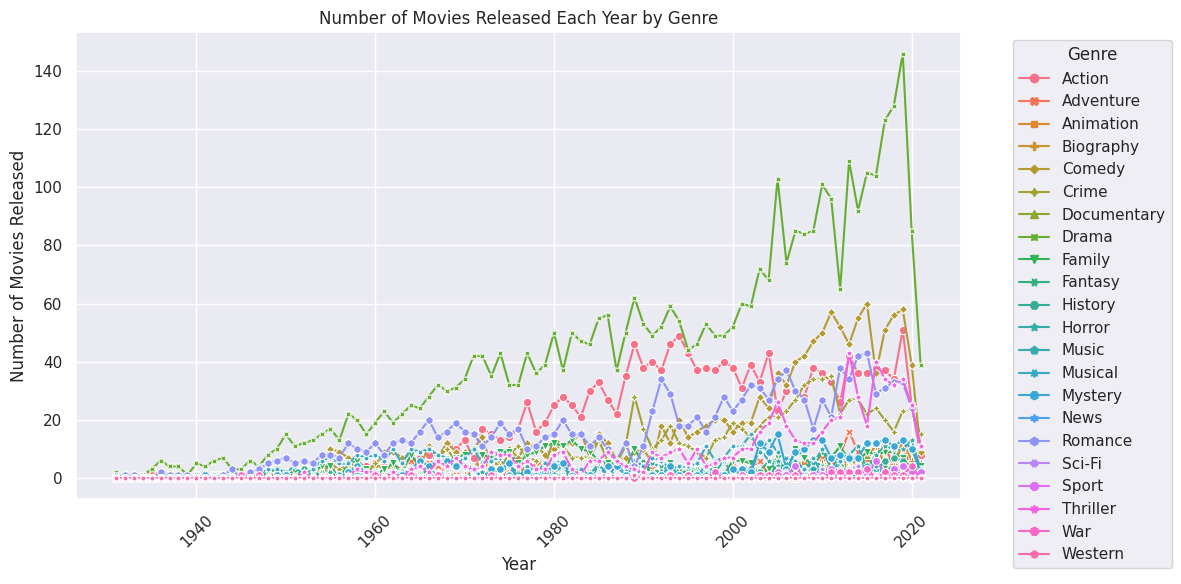

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Disable use_inf_as_na option to remove FutureWarning
sns.set_theme()

genres = movie_dataset['Genre'].str.get_dummies(sep=', ')

# Add the 'Year' column to the new DataFrame
genres['Year'] = movie_dataset['Year']

# Group by year and sum the counts of each genre
genres_yearwise = genres.groupby('Year').sum()

# Plot the graph using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=genres_yearwise, markers=True, dashes=False)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year by Genre')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Feature Engineering:
* Extract useful features from the dataset that might influence the movie ratings. For example, you can create new features such as the total number of movies directed by a director, the average rating of the movies a particular actor has acted in, etc.
* Perform feature scaling if necessary to standardize the range of features.


In [21]:
movie_dataset.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [22]:
import pandas as pd

actors = pd.concat([movie_dataset['Actor 1'], movie_dataset['Actor 2'], movie_dataset['Actor 3']], ignore_index=True)

actor_ratings = pd.DataFrame({'Actor': actors, 'Rating': movie_dataset['Rating']})

# Group the data by actor and calculate the average rating of the movies in which each actor has acted
actor_average_rating = actor_ratings.groupby('Actor')['Rating'].mean()

movie_dataset['Avg_Rating_by_Actor'] = movie_dataset['Actor 1'].map(actor_average_rating)


In [23]:
movie_dataset.head()

Name    Year Duration  \
1  #Gadhvi (He thought he was Gandhi)  2019.0      109   
3                             #Yaaram  2019.0      110   
5                ...Aur Pyaar Ho Gaya  1997.0      147   
6                           ...Yahaan  2005.0      142   
8                  ?: A Question Mark  2012.0       82   

                       Genre  Rating  Votes        Director          Actor 1  \
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War     7.4  1,086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  Avg_Rating_by_Actor  
1          Vivek Ghamande    Arvind Jangid             4.166667  
3              Ishita Raj  Siddhant Kapoor             6.400000  
5  Aishwarya Rai Bachchan    Shammi Kapoor             5.544444  
6          Minissha Lamba   Yashpal Sharma             5.568750  
8          Muntazir Ahmad     Kiran Bhatia                  NaN

In [24]:
# Count the number of missing values in each column
missing_values = movie_dataset.isna().sum()

# Display the count of missing values for each column
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
Name                     0
Year                     0
Duration                 0
Genre                    0
Rating                   0
Votes                    0
Director                 0
Actor 1                  0
Actor 2                  0
Actor 3                  0
Avg_Rating_by_Actor    848
dtype: int64


In [25]:
# Impute missing values in 'Avg_Rating_by_Actor' with the mean value of the column
mean_rating_by_actor = movie_dataset['Avg_Rating_by_Actor'].mean()
movie_dataset['Avg_Rating_by_Actor'] = movie_dataset['Avg_Rating_by_Actor'].fillna(mean_rating_by_actor)

# Verify that missing values have been filled
missing_values_after_imputation = movie_dataset.isna().sum()

# Display the count of missing values for each column after imputation
print("Number of missing values in each column after imputation:")
print(missing_values_after_imputation)


Number of missing values in each column after imputation:
Name                   0
Year                   0
Duration               0
Genre                  0
Rating                 0
Votes                  0
Director               0
Actor 1                0
Actor 2                0
Actor 3                0
Avg_Rating_by_Actor    0
dtype: int64


In [26]:
missing_values_after_imputation.head()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
dtype: int64

In [27]:
movie_dataset.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Avg_Rating_by_Actor'],
      dtype='object')

# Model Selection:
* Choose a regression model suitable for predicting movie ratings. Common choices include linear regression, decision trees, random forests, gradient boosting, or neural networks.
* Split the dataset into training and testing sets using techniques like train-test split or cross-validation.


In [28]:
# Remove commas from the 'Votes' column and convert it to numeric format
movie_dataset['Votes'] = movie_dataset['Votes'].str.replace(',', '').astype(float)


In [29]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = movie_dataset[['Year', 'Duration', 'Votes', 'Avg_Rating_by_Actor']]
y = movie_dataset['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (3959, 4)
Shape of X_test: (1698, 4)
Shape of y_train: (3959,)
Shape of y_test: (1698,)


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN': KNeighborsRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Print model performance
    print(f"{name}:")
    print(f"Mean Squared Error: {mse}")
    print()


Linear Regression:
Mean Squared Error: 1.7802976625656477

Decision Tree:
Mean Squared Error: 2.5617962308598345

Random Forest:
Mean Squared Error: 1.4436624929328623

Gradient Boosting:
Mean Squared Error: 1.3563022427132776

KNN:
Mean Squared Error: 1.652976207302709



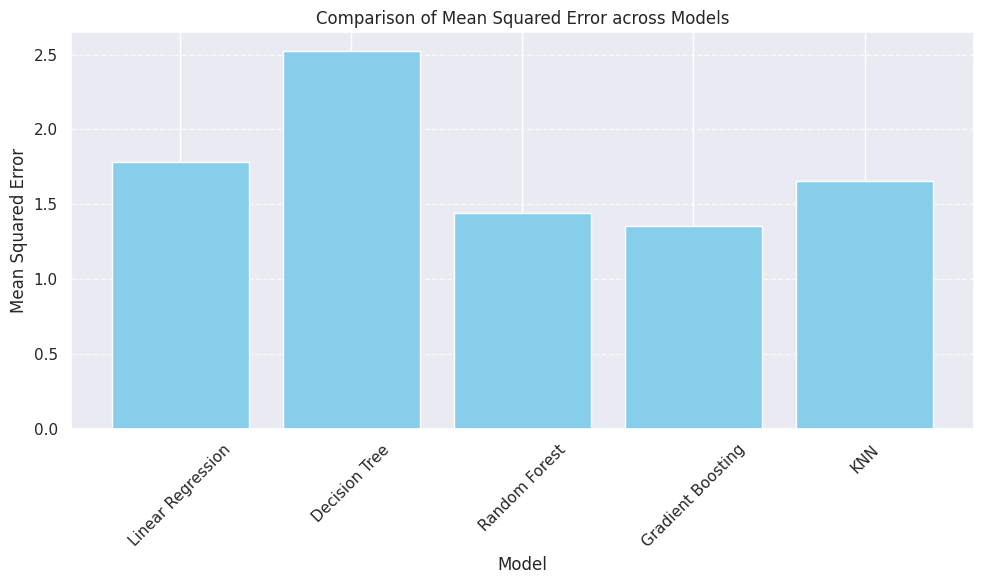

In [31]:
# Store the mean squared errors of each model
mean_squared_errors = {
    'Linear Regression': 1.7802976625656477,
    'Decision Tree': 2.5230447585394584,
    'Random Forest': 1.441852362779741,
    'Gradient Boosting': 1.356287009670201,
    'KNN': 1.652976207302709
}

# Plot the mean squared errors
plt.figure(figsize=(10, 6))
plt.bar(mean_squared_errors.keys(), mean_squared_errors.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error across Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The **Gradient Boosting** model has the lowest mean squared error of 1.3563, indicating that it performs the best among the models evaluated in terms of predicting movie ratings based on the features provided. Therefore, the Gradient Boosting model can be considered the best model for this particular task.

Mean Squared Error: 1.356532860441912


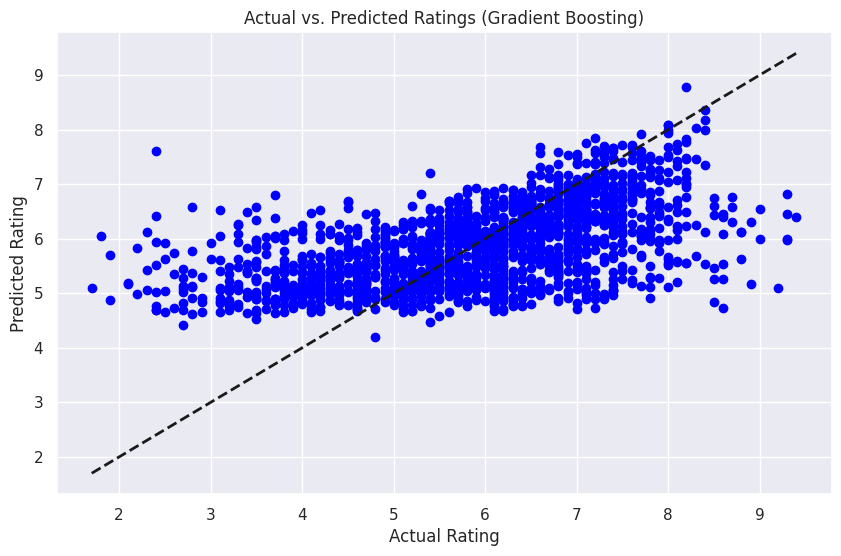

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings (Gradient Boosting)')
plt.show()

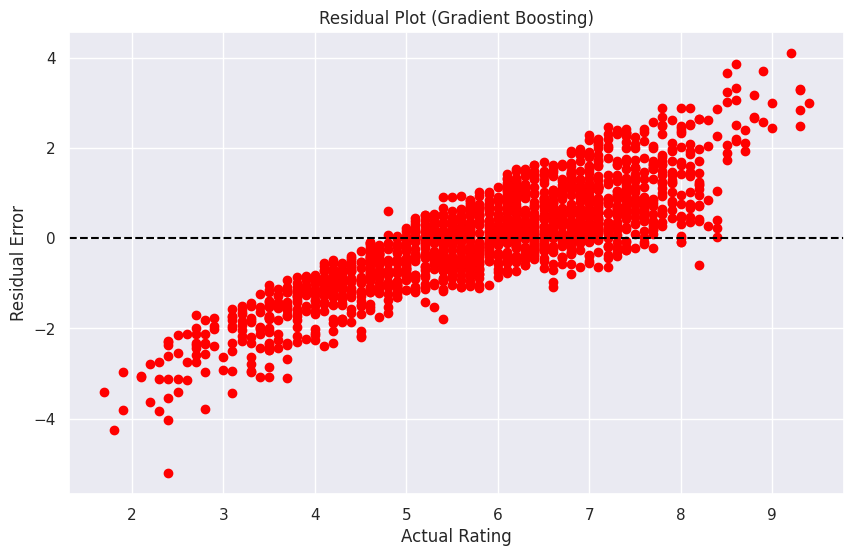

In [33]:
# Visualize the residual errors
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Residual Error')
plt.title('Residual Plot (Gradient Boosting)')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()


In [34]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.356532860441912


# Testing of Model

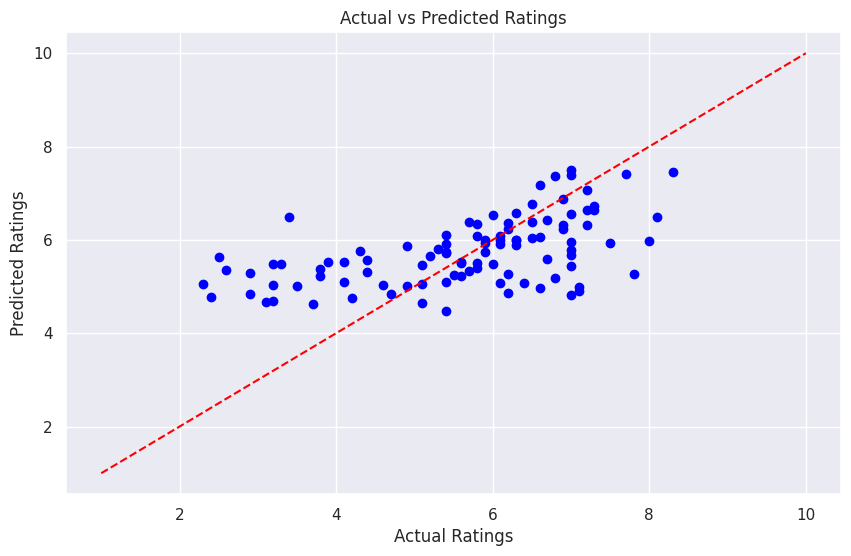

In [35]:
# Select a subset of data for testing
test_data = X_test.sample(n=100, random_state=42)  # Selecting 100 random samples from the test set
actual_ratings = y_test.loc[test_data.index]  # Actual ratings corresponding to the selected samples

# Make predictions on the selected test data
predicted_ratings = gb_model.predict(test_data)

# Plot actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(actual_ratings, predicted_ratings, color='blue')
plt.plot([1, 10], [1, 10], color='red', linestyle='--')  # Plotting the line of perfect predictions
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

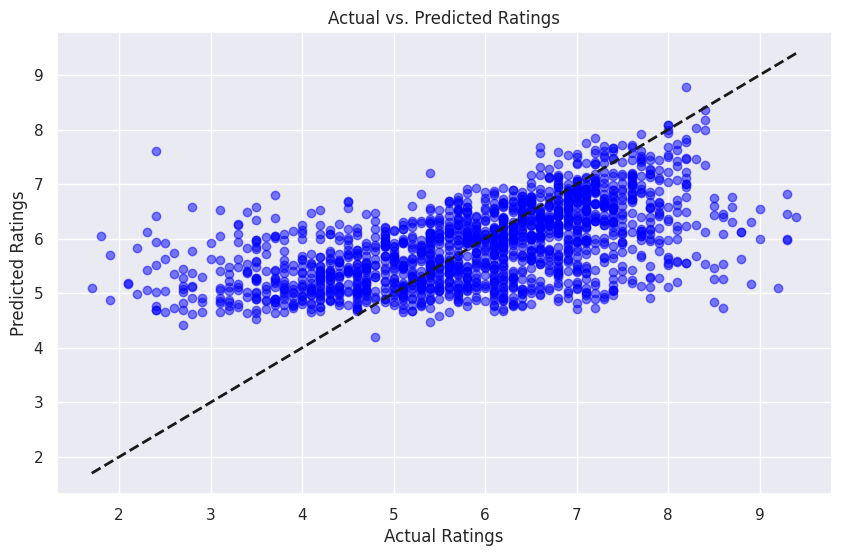

In [36]:
# Visualize the actual ratings versus predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()

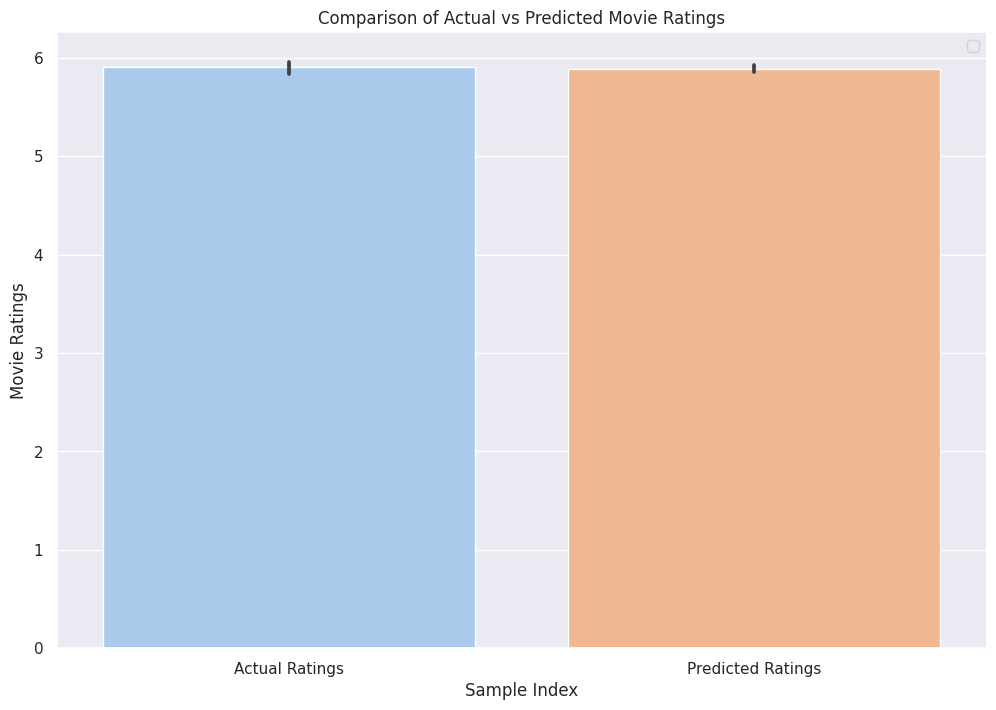

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for actual and predicted ratings
result_df = pd.DataFrame({'Actual Ratings': y_test, 'Predicted Ratings': y_pred})

# Plot the actual and predicted ratings
plt.figure(figsize=(12, 8))
sns.barplot(data=result_df, palette='pastel')

plt.xlabel('Sample Index')
plt.ylabel('Movie Ratings')
plt.title('Comparison of Actual vs Predicted Movie Ratings')
plt.legend(loc='upper right')
plt.show()


# Awesome

# Saving model

In [38]:
# from joblib import dump

# model_file_path = 'gradient_boosting_model.joblib'

# dump(gb_model, model_file_path)

# print(f"Gradient Boosting model saved to {model_file_path}")